In [1]:
import lightkurve
from lightkurve import KeplerTargetPixelFile
import lightkurve.injection as inj
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()

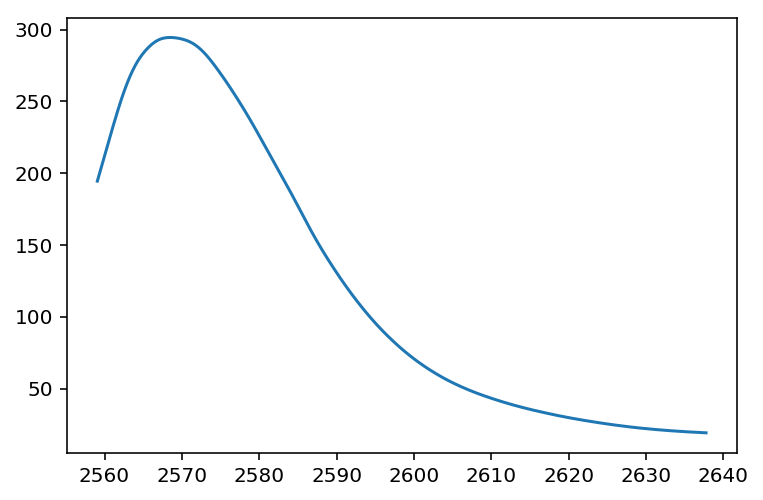

In [3]:
model = inj.SupernovaModel()
#t0=np.nanmedian(lc.time)
flux = model.evaluate(lc.time, t0=2570, amplitude=1e-4)

plt.plot(lc.time, flux)

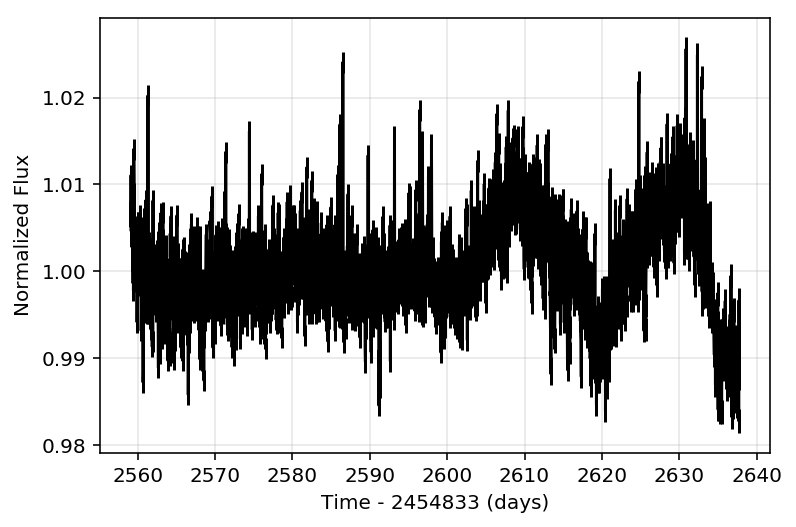

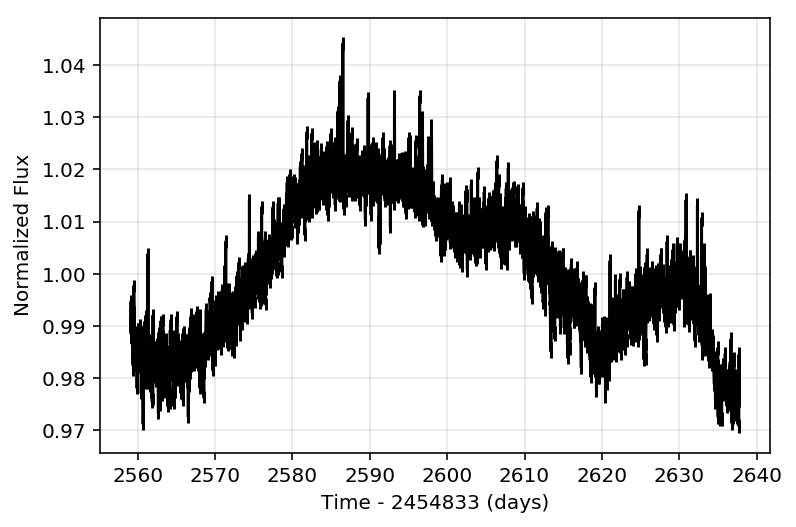

In [4]:
lcinj = inj.inject(lc, model, amplitude=1e-4)

lc.plot()

lcinj.plot()


In [5]:
model2 = inj.TransitModel(rprs=0.9)
print(model2.period)
print(model2.rprs)

[18.86581953]
0.9


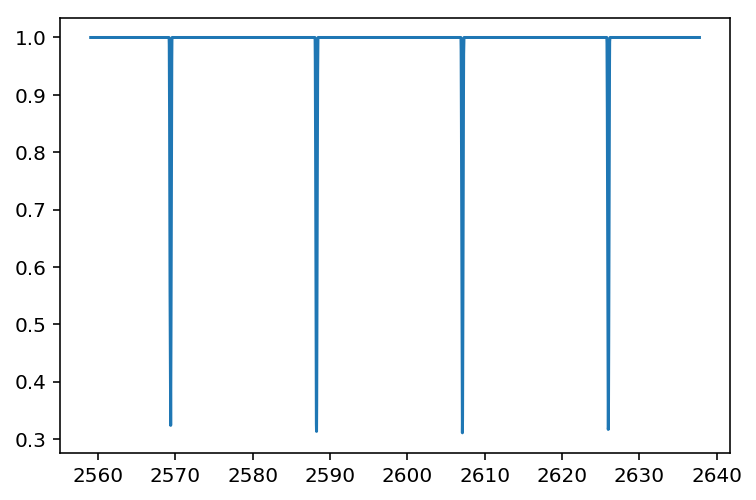

In [6]:
flux2 = model2.evaluate(lc.time)
plt.plot(lc.time, flux2)

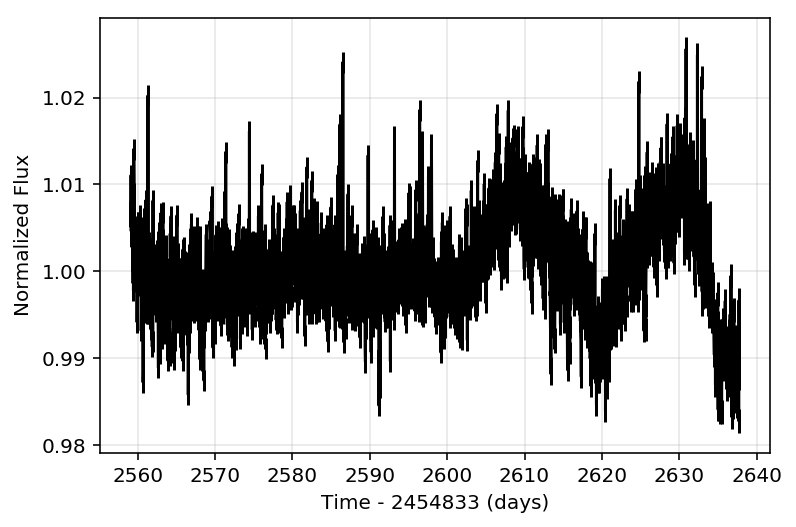

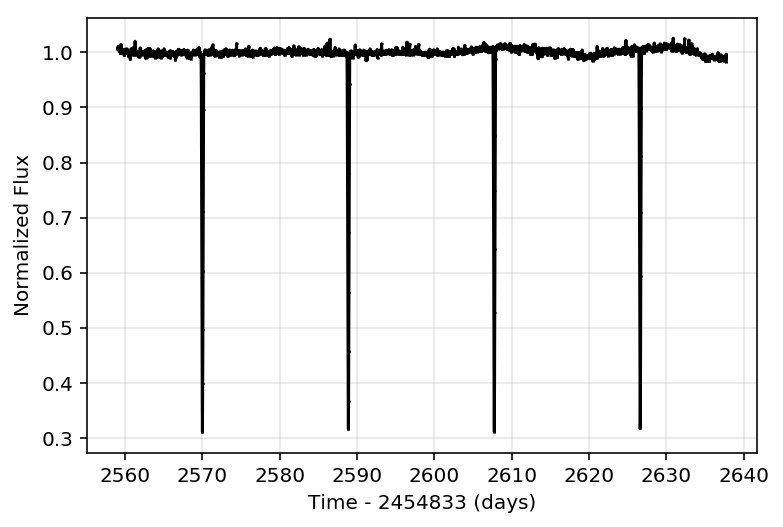

In [7]:
lcinj2 = inj.inject(lc, model2)

lc.plot()

lcinj2.plot()